In [21]:
import numpy as np

# parameters
dt = 0.1 #[h]
N = 300; #number of samples
T = N * dt #whole time of simulation [h]
G = 6.67430 * (10**(-11-3-3-3)) * 3600 #[km^3 / kg*h^2]
M = 1.89819 * 10**27 # Mass of the planet (Jupiter) [kg]
x0p = 0 #start location of the planet
y0p = 0
x0s = 10000 #start location of the spacecraft [km]
y0s = -20000
Vxp = 1000 #velocity of the planet [km/h]
Vyp = 0
vx0s = -3000 #initial velocity of the spacecraft [km/h]
vy0s = 200

#calculation variables
Xs = np.zeros(N) #x axis location of a spacecraft
Ys = np.zeros(N) #y axis location of a spacecraft

Xp = np.zeros(N) #x axis location of a planet
Yp = np.zeros(N) #y axis location of a planet

Vxs = np.zeros(N) #x axis velocity of a spacecraft
Vys = np.zeros(N) #y axis vleocity of a spacecraft


#intial state
Xs[0] = x0s
Ys[0] = y0s

Xp[0] = x0p
Yp[0] = y0p

Vxs[0] = vx0s
Vys[0] = vy0s

In [22]:
def calculateRange(xp,yp,xs,ys):
    return np.sqrt((xp-xs)**2+(yp-ys)**2)

def calculateVelocity(Vi,loci,r):
    return Vi - (G*M*loci)/(r**3) * dt

def calculatePosition(loci, Vi_):
    return loci + Vi_*dt

In [43]:
#Simple iterative approach

for i in range(1,N):
    # range between planet and spacecraft
    r = calculateRange(Xp[i-1],Yp[i-1],Xs[i-1],Ys[i-1])
    
    # velocity of the spacecraft
    Vxs[i] = calculateVelocity(Vxs[i-1],Xs[i-1],r)
    print(Vxs[i])
    Vys[i] = calculateVelocity(Vys[i-1],Ys[i-1],r)
    
    # location of a spacecraft
    Xs[i] = calculatePosition(Xs[i-1],Vxs[i])
    Ys[i] = calculatePosition(Ys[i-1],Vys[i])
    
    # location of a planet
    Xp[i] = calculatePosition(Xp[i-1],Vxp)
    Yp[i] = calculatePosition(Yp[i-1],Vyp)

-3040.7936813371803
-3081.444839071987
-3121.927352481622
-3162.212071522099
-3202.2664571422038
-3242.0541758656886
-3281.534642438062
-3320.6625034779886
-3359.3870541096194
-3397.651578474193
-3435.3926038230666
-3472.5390565809867
-3509.0113073470425
-3544.7200902929753
-3579.5652808645787
-3613.4345141596464
-3646.2016249529515
-3677.7248892297625
-3707.8450465196443
-3736.3830826495864
-3763.137754273055
-3787.882840404473
-3810.364113206598
-3830.2960318262253
-3847.358181020037
-3861.1915031289927
-3871.3944108370497
-3877.518923075565
-3879.067042168179
-3875.4876921470495
-3866.17467130735
-3850.466240302129
-3827.647170467686
-3796.954308074528
-3757.586947955828
-3708.723512611338
-3649.546128892377
-3579.2745757413454
-3497.2105996963164
-3402.792599442692
-3295.6590368632005
-3175.7166262497894
-3043.2066029366874
-2898.759728853698
-2743.4290502416925
-2578.689838243442
-2406.3994168186473
-2228.71571767148
-2047.9812352699776
-1866.5864082395292
-1686.8309202691999
-151

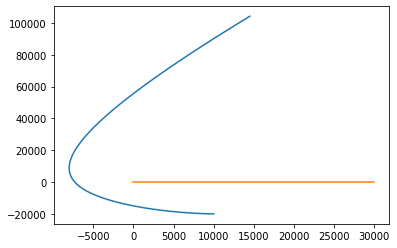

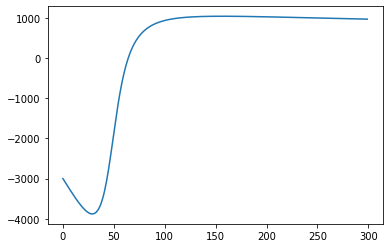

In [44]:
import matplotlib.pyplot as plt

plt.plot(Xs,Ys,Xp,Yp)
plt.show()

plt.plot(Vxs)
plt.show()

In [25]:
def calculateRange_RK(xp,yp,xs,ys):
    return np.sqrt((xp-xs)**2+(yp-ys)**2)

def calculateVelocity_RK(Vi,loci,r,dt):
    return Vi - (G*M*loci)/(r**3) * dt

def calculatePosition_RK(loci, Vi_,dt):
    return loci + Vi_*dt

In [45]:
#calculation variables
Xs = np.zeros(N) #x axis location of a spacecraft
Ys = np.zeros(N) #y axis location of a spacecraft

Xp = np.zeros(N) #x axis location of a planet
Yp = np.zeros(N) #y axis location of a planet

Vxs = np.zeros(N) #x axis velocity of a spacecraft
Vys = np.zeros(N) #y axis vleocity of a spacecraft


#intial state
Xs[0] = x0s
Ys[0] = y0s

Xp[0] = x0p
Yp[0] = y0p

Vxs[0] = vx0s
Vys[0] = vy0s

In [61]:
#Runge-Kutta 4th order method
h = dt

for i in range(1,N):
    # range between planet and spacecraft
    r = calculateRange_RK(Xp[i-1],Yp[i-1],Xs[i-1],Ys[i-1])
    
    # velocity of the spacecraft
    k1 = calculateVelocity_RK(Vxs[i-1], Xs[i-1],r,dt)
    k2 = calculateVelocity_RK(Vxs[i-1] + h*k1/2, Xs[i-1], r, dt+h/2)
    k3 = calculateVelocity_RK(Vxs[i-1] + h*k2/2, Xs[i-1], r, dt+h/2)
    k4 = calculateVelocity_RK(Vxs[i-1] + h*k3, Xs[i-1], r, dt+h)
    Vxs[i] = Vxs[i-1] + (1/6) * h * (k1+2*k2+2*k3+k4)
    print(Vxs[i])
    
    k1 = calculateVelocity_RK(Vys[i-1], Ys[i-1], r, dt)
    k2 = calculateVelocity_RK(Vys[i-1] + h*k1/2, Ys[i-1], r, dt+h/2)
    k3 = calculateVelocity_RK(Vys[i-1] + h*k2/2, Ys[i-1], r, dt+h/2)
    k4 = calculateVelocity_RK(Vys[i-1] + h*k3, Ys[i-1], r, dt+h)
    Vys[i] = Vys[i-1] + (1/6) * h * (k1+2*k2+2*k3+k4)
    
    # location of a spacecraft
    k1 = calculatePosition_RK(Xs[i-1],Vxs[i], dt)
    k2 = calculatePosition_RK(Xs[i-1] + h*k1/2, Vxs[i], dt+h/2)
    k3 = calculatePosition_RK(Xs[i-1] + h*k2/2 ,Vxs[i], dt+h/2)
    k4 = calculatePosition_RK(Xs[i-1] + h*k3, Vxs[i], dt+h)
    Xs[i] = Xs[i-1] + (1/6) * h * (k1+2*k2+2*k3+k4)
    
    k1 = calculatePosition_RK(Ys[i-1],Vys[i], dt)
    k2 = calculatePosition_RK(Ys[i-1] + h*k1/2, Vys[i], dt+h/2)
    k3 = calculatePosition_RK(Ys[i-1] + h*k2/2 ,Vys[i], dt+h/2)
    k4 = calculatePosition_RK(Ys[i-1] + h*k3, Vys[i], dt+h)
    Ys[i] = Ys[i-1] + (1/6) * h * (k1+2*k2+2*k3+k4)
    
    # location of a planet
    k1 = calculatePosition_RK(Xp[i-1],Vxp, dt)
    k2 = calculatePosition_RK(Xp[i-1] + h*k1/2, Vxp, dt+h/2)
    k3 = calculatePosition_RK(Xp[i-1] + h*k2/2 ,Vxp, dt+h/2)
    k4 = calculatePosition_RK(Xp[i-1] + h*k3, Vxp, dt+h)
    Xp[i] = Xp[i-1] + (1/6) * h * (k1+2*k2+2*k3+k4)
    
    k1 = calculatePosition_RK(Yp[i-1],Vyp, dt)
    k2 = calculatePosition_RK(Yp[i-1] + h*k1/2, Vyp, dt+h/2)
    k3 = calculatePosition_RK(Yp[i-1] + h*k2/2 ,Vyp, dt+h/2)
    k4 = calculatePosition_RK(Yp[i-1] + h*k3, Vyp, dt+h)
    Yp[i] = Yp[i-1] + (1/6) * h * (k1+2*k2+2*k3+k4)
    
print(Vxs)

-3321.9121787334425
-3676.5166444356882
-4067.4627649066397
-4498.745511472588
-4974.748700252424
-5500.29154098074
-6080.679063839103
-6721.75701473742
-7429.971838853375
-8212.436410594644
-9077.002215351698
-10032.338744513047
-11088.020930446784
-12254.625522894457
-13543.837393003509
-14968.566846711255
-16543.07913619421
-18283.137477561013
-20206.161015990736
-22331.399327349685
-24680.12520937064
-27275.84769733449
-30144.547440629463
-33314.93679955531
-36818.74726848981
-40691.04710448601
-44970.59234223181
-49700.21471008209
-54927.250330894276
-60704.013499341934
-67088.32027832152
-74144.06715550945
-81941.87055205248
-90559.77358429275
-100084.02715242875
-110609.95317382837
-122242.89860077969
-135099.28977101625
-149307.7976434755
-165010.62558149142
-182364.93257208957
-201544.40612551826
-222741.00059717998
-246166.85832971227
-272056.4328426785
-300668.835319476
-332290.4278758913
-367237.68956459535
-405860.3837994953
-448545.05890056136
-495718.9167937204
-547854.0

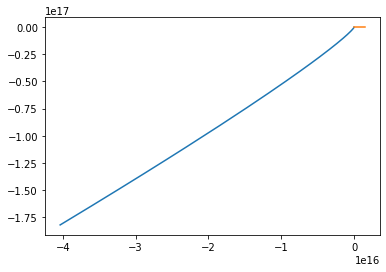

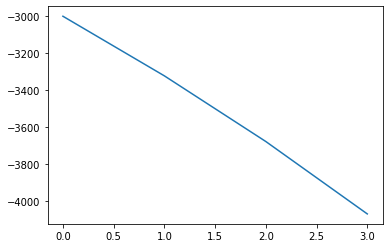

In [62]:
import matplotlib.pyplot as plt

plt.plot(Xs,Ys,Xp,Yp)
plt.show()

plt.plot(Vxs[:4])
plt.show()